In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
upload=files.upload()

Saving train.csv to train.csv


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets


In [ ]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [ ]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [ ]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def ReLU_deriv(Z):
    return Z > 0

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [ ]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 3 9 ... 6 0 4] [1 8 1 ... 3 0 8]
0.08385365853658537
Iteration:  10
[3 3 3 ... 8 0 8] [1 8 1 ... 3 0 8]
0.16458536585365854
Iteration:  20
[3 3 3 ... 8 0 8] [1 8 1 ... 3 0 8]
0.24314634146341463
Iteration:  30
[3 3 3 ... 0 0 8] [1 8 1 ... 3 0 8]
0.31370731707317073
Iteration:  40
[3 3 1 ... 0 0 3] [1 8 1 ... 3 0 8]
0.3857317073170732
Iteration:  50
[3 3 1 ... 0 0 3] [1 8 1 ... 3 0 8]
0.43617073170731707
Iteration:  60
[3 3 1 ... 3 0 3] [1 8 1 ... 3 0 8]
0.46948780487804875
Iteration:  70
[1 3 1 ... 3 0 3] [1 8 1 ... 3 0 8]
0.4966829268292683
Iteration:  80
[1 3 1 ... 3 0 0] [1 8 1 ... 3 0 8]
0.5219268292682927
Iteration:  90
[1 3 1 ... 3 0 0] [1 8 1 ... 3 0 8]
0.5420975609756098
Iteration:  100
[1 8 1 ... 3 0 0] [1 8 1 ... 3 0 8]
0.561
Iteration:  110
[1 8 1 ... 3 0 0] [1 8 1 ... 3 0 8]
0.5761951219512195
Iteration:  120
[1 8 1 ... 3 0 0] [1 8 1 ... 3 0 8]
0.5903414634146341
Iteration:  130
[1 8 1 ... 3 0 0] [1 8 1 ... 3 0 8]
0.6020731707317073
Iteration:  140
[1 8 1 .

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [ ]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


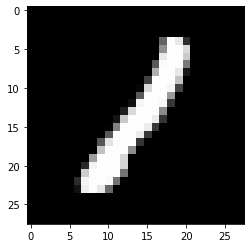

Prediction:  [8]
Label:  8


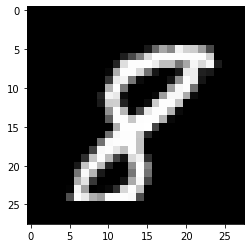

Prediction:  [1]
Label:  1


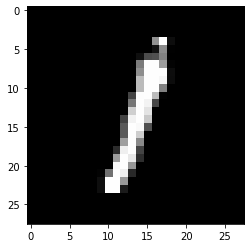

Prediction:  [1]
Label:  1


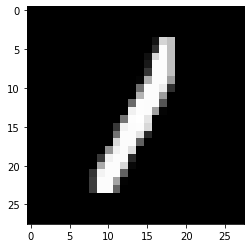

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)